# Olympics Performance Analysis

### Data Science Framework 
__1. Problem Definition:__ It is extremely essential to understand the problem at hand, the scope and the solution required. Problems before requirements, requirements before solutions, solutions before design, and design before technology. <br>
<br> __2. Data Gathering:__ The first stage of any analysis it to gather the required dataset needed to solve the problem at hand. <br>
<br> __3. Data Wrangling & Preparation:__ It is only in ideal situations that the required dataset is clean, complete and ready for analysis. To ensure accurate results, the data gathered needs to be prepared; ETL and data cleaning to identify discrepancies (missing values, incorrect values, data formats, outliers) <br>
<br> __4. Exploration Data Analysis (EDA):__ Garbage in = Garbage out. Thus, it is important to deploy descriptive and graphical statistics to look for potential problems, patterns, classifications, correlations and comparisons in the dataset. <br>
<br> __5. Data Solutions:__ Given the problem, the right data solution needs to be implemented. This can be anywhere from analytical outputs, visualizations, data modeling. 


### Problem Definition:
Given the Olympic Games Historical Dataset, analyze and report the correct information for the following questions: <br>
1. Find the five athletes who won the most gold medals in Athletics <br>
2. Find the five athletes who won gold medals in the largest number of different athletic events <br>
3. If the olympics committee found guilty of doping the first and the third of the five athletes from question2, create a new medals.csv dataset with redistributed medals after the gold medals of those two athletes are removed. Who then are the top five that won gold medals in the largest number of different athletic events?

### Data Gathering:
For this project, the raw dataset "medals.csv" has been provided. So, no further data gathering needs to be done in order to proceed. Given the problem definition, this dataset contains all the relevant information needed.

### Data Wrangling & Preparation:
Given the "medals.csv" dataset, data wrangling is out of scope. Thus, the only action needed in this step is to load the dataset into a dataframe and prepare it for analysis 

In [1]:
#importing all relevant libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#for visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
#loading the required dataset "medals.csv"

data = open("medals.csv")
data1 = data.read().replace(", ", " ")
data2 = data1.replace('"', '')
df = pd.DataFrame([x.split(',') for x in data2.split('\n')[1:]], columns=[x for x in data2.split('\n')[0].split(',')])
data.close()


__Note:__ This particular method was chosen as a few problems were encountered in loading the dataset into a pandas dataframe. The "medals.csv" file was encoded with utf-8-BOM, the newline character (") also existed within the row values that led to uninteneded row splitting and finally, the delimiter (,) was also present within row values. So, the best (and fastest, though not the prettiest) method was to read the file, replace newline character and the inconsistent delimiter, and load the text into a pandas dataframe. This is a problem that I haven't encountered before, so given feedback on what is the most efficient method, I will incoporate it into my workflow. 

Time to explore the dataset; understand the dataset, explore null values, fix the dtypes of the different columns and remove the null rows (if any)

In [3]:
df.head(n=3)
#I see a problem in the Games column name, that's because of the utf-8-bom encoding. 

,ï»¿Games,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
0,Athens (1896),1896,Aquatics,Swimming,alfred hajos,HUN,Men,100m freestyle men,Gold,1,0,0
1,Athens (1896),1896,Aquatics,Swimming,Otto Herschmann,AUT,Men,100m freestyle men,Silver,0,1,0
2,Athens (1896),1896,Aquatics,Swimming,dimitrios drivas,GRE,Men,100m freestyle for sailors men,Bronze,0,0,1


In [4]:
df.info()
#The medal columns have null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
ï»¿Games      10999 non-null object
Year          10999 non-null object
Sport         10999 non-null object
Discipline    10999 non-null object
Athlete       10999 non-null object
Team          10999 non-null object
Gender        10999 non-null object
Event         10999 non-null object
Medal         10998 non-null object
Gold          10998 non-null object
Silver        10998 non-null object
Bronze        10998 non-null object
dtypes: object(12)
memory usage: 1.0+ MB


In [5]:
df.dtypes 
#everything is defined as an object. We need the Gold, Silver and Bronze, Year to be int 

ï»¿Games      object
Year          object
Sport         object
Discipline    object
Athlete       object
Team          object
Gender        object
Event         object
Medal         object
Gold          object
Silver        object
Bronze        object
dtype: object

In [6]:
#making sure that the None values are converted to nan so that in the future they don't cause 
#issues
df = df.fillna(value=np.nan)
df[df.isna().any(axis=1)]

#Yes, confirmed regarding null values. Will remove this row.

,ï»¿Games,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
10998,Tokyo (1964),1964,Boxing,Boxing,Juan Fabila mendoza,MEX,Men,51 - 54kg (banta,NaN,NaN,NaN,NaN


In [7]:
#removing null values as they might cause problems in aggregation statistics
df.dropna(inplace=True)

#rename the Games column, so it's all neat and tidy
df = df.rename(columns={'ï»¿Games': 'Games'})

In [8]:
#changing the dtype of the columns to numerical values 
df[["Year", "Gold", "Silver", "Bronze"]] = df[["Year", "Gold", "Silver", "Bronze"]].apply(pd.to_numeric)

In [9]:
#check that there isn't a row with multiple medals 
print("Max Medals per row: ", (df['Gold'] + df['Silver'] + df['Bronze']).max())
#check that there isn't a row with multiple medals 
print("Min Medals per row: ", (df['Gold'] + df['Silver'] + df['Bronze']).min())

#no empty rows either, where it's 0 instead of null. 


Max Medals per row:  1
Min Medals per row:  1


### Exploratory Data Analysis:
Let's explore the dataset and see what we find. Going to look at descriptive statistics and distributions of different variables. Going to create visualizations to best see what the data represents

In [10]:
#checking the descriptive statistics
df.describe(include= 'all')

,Games,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
count,10998,10998.000000,10998,10998,10998,10998,10998,10998,10998,10998.000000,10998.000000,10998.000000
unique,15,NaN,34,41,8284,70,2,420,3,NaN,NaN,NaN
top,Antwerp (1920),NaN,Athletics,Athletics,Edoardo Mangiarotti,USA,Men,football men,Gold,NaN,NaN,NaN
freq,1298,NaN,1640,1640,13,1988,9978,547,3858,NaN,NaN,NaN
mean,NaN,1931.376614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.350791,0.336970,0.312239
std,NaN,19.698441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.477239,0.472696,0.463428
min,NaN,1896.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,1912.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,NaN,1928.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
75%,NaN,1952.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000


In [11]:
df.head(n=3)

#sorting the dataset so it's organized by year, event and then gold medalist is first, 
#followed by silver and then bronze. 
df = df.sort_values(by=['Year', 'Event', 'Gold', 'Silver'], ascending =  [True, False, False, False]).reset_index(drop=True)


In [12]:
df.Sport.value_counts()

Athletics            1640
Aquatics             1264
Gymnastics           1214
Rowing                912
Fencing               727
Shooting              697
Football              547
Sailing               539
Wrestling             451
Cycling               421
Hockey                374
Equestrian            357
Boxing                306
Basketball            222
Canoe / Kayak         198
Rugby                 192
Weightlifting         168
Tennis                154
Archery               137
Tug of War             94
Polo                   66
Handball               61
Lacrosse               59
Modern Pentathlon      57
Golf                   30
Ice Hockey             27
Skating                27
Cricket                24
Rackets                10
Croquet                 8
Water Motorsports       5
Basque Pelota           4
Roque                   3
Jeu de paume            3
Name: Sport, dtype: int64

In [13]:
df.Discipline.value_counts()

Athletics                 1640
Artistic Gymnastics       1214
Rowing                     912
Swimming                   753
Fencing                    727
Shooting                   697
Football                   547
Sailing                    539
Hockey                     374
Water polo                 359
Boxing                     306
Cycling Track              289
Wrestling Freestyle        232
Basketball                 222
Wrestling Greco-Romano     219
Canoe / Kayak F            198
Rugby                      192
Weightlifting              168
Tennis                     154
Diving                     152
Archery                    137
Jumping                    133
Cycling Road               132
Eventing                   126
Tug of War                  94
Dressage                    84
Polo                        66
Handball                    61
Lacrosse                    59
Modern Pentathlon.          57
Golf                        30
Figure skating              27
Ice Hock

Text(0.5, 1.0, 'Medals by Year')

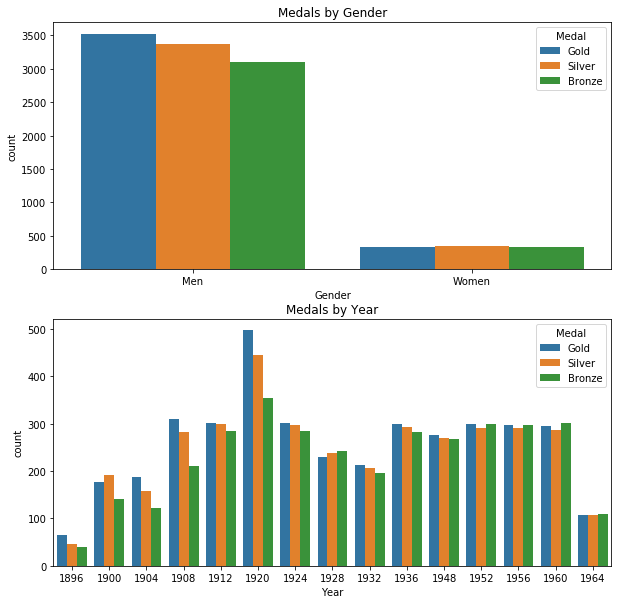

In [14]:
#medal won distribution by gender and year
fig, saxis = plt.subplots(2, 1,figsize=(10,10))

sns.countplot(x = 'Gender', hue = 'Medal', data=df, ax = saxis[0]).set_title('Medals by Gender')
sns.countplot(x = 'Year', hue = 'Medal', data=df, ax = saxis[1]).set_title('Medals by Year')


Text(0.5, 1.0, 'Highest Occuring Sports')

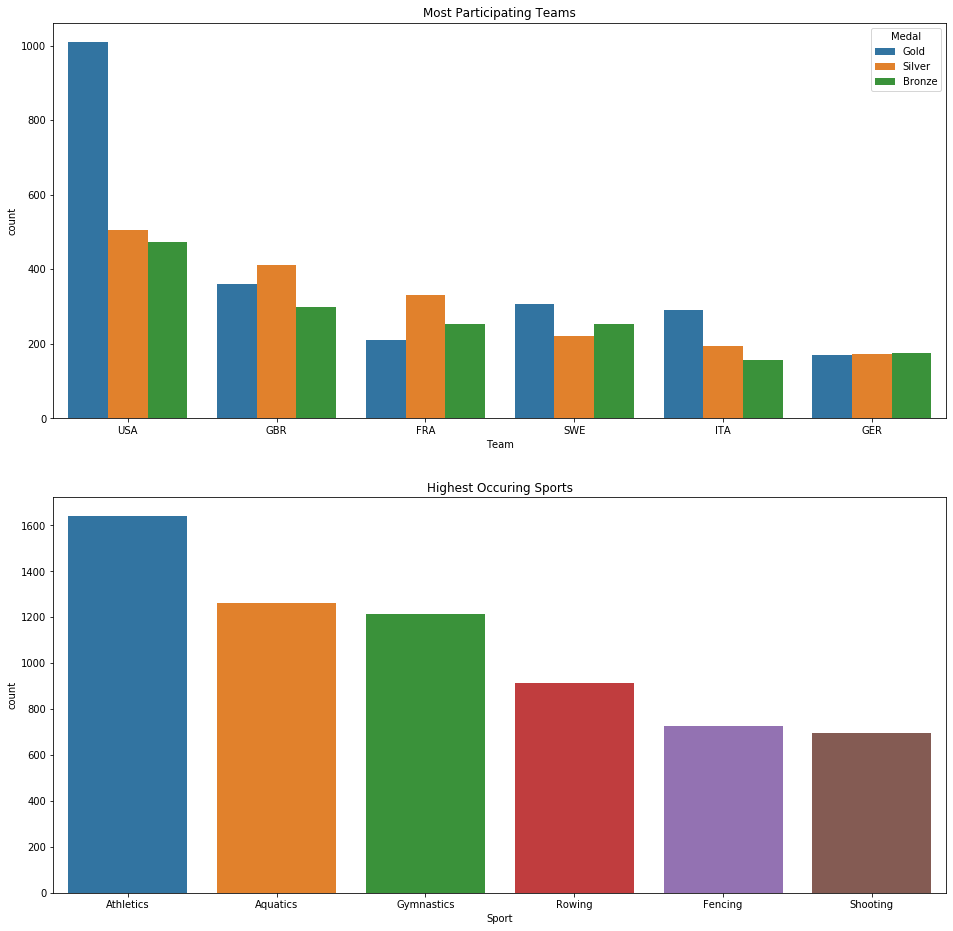

In [15]:
#highest participating teams and and their  medal distribution + what sports are held more often
fig, saxis  = plt.subplots(2, 1, figsize=(16,16))

sns.countplot(x = 'Team', hue= 'Medal', data=df, order=df.Team.value_counts().iloc[:6].index, ax = saxis[0]).set_title('Most Participating Teams')
sns.countplot(x = 'Sport', data=df, order=df.Sport.value_counts().iloc[:6].index, ax = saxis[1]).set_title('Highest Occuring Sports')


For the sake of time and current project problem at hand, no more EDA is necessary, so I am going to proceed to the problem questions <br>
1. Find the five athletes who won the most gold medals in Athletics


In [16]:
df[df.Sport == 'Athletics'][df.Medal == 'Gold'].groupby(['Athlete']).agg({'Gold': sum}).sort_values(by=['Gold'], ascending =  False)[:7]

#So, the the top 2 of the athletes is quite clear. The 3rd - 5th highest is tied at 4 Gold Medals,
#with many other athletes sharing this position. Another condition needs to be added. 

,Gold
Athlete,
Paavo Nurmi,9
Ville Ritola,5
Jesse Owens,4
Alvin Kraenzlein,4
Emil Zatopek,4
Fanny Blankers-koen,4
Ray Ewry,4


2. Find the five athletes who won gold medals in the largest number of different athletic events <br>

In [17]:
df[df.Sport == 'Athletics'][df.Medal == 'Gold'].groupby(['Athlete']).agg({'Gold': sum, 'Event': pd.Series.nunique }).sort_values(by=['Event'], ascending =  [False])[:6]
#similar situation here as in question 1.

,Gold,Event
Athlete,,
Paavo Nurmi,9,6
Ville Ritola,5,5
Alvin Kraenzlein,4,4
Hannes Kolehmainen,4,4
Fanny Blankers-koen,4,4
Betty Cuthbert,4,4


3. If the olympics committee found guilty of doping the first and the third of the five athletes from question2, create a new medals.csv dataset with redistributed medals after the gold medals of those two athletes are removed. Who then are the top five that won gold medals in the largest number of different athletic events?

__Note:__ Have to make quite a few assumptions here. First, there is no clear differentiation in who the top 3rd athlete is (and no further criteria is specified) so I am going to assume it to be Alvin Kraenzlein. Second, after reviewing official Olympic Guidelines, in case of disqualification, the medals are shifted to the athlete in the next position (Silver -> Gold). Third, disqualifications happen on case basis per Olympic games and not the complete career. So, I am going to disqualify these athletes from their most recent Olympic games. Lastly, as there are no 4th place athletes, bronze medal will not be allocated to an athlete. 

In [18]:
disqualified = ['Paavo Nurmi', 'Alvin Kraenzlein']

In [19]:
#before we begin to redistribute the medals, let's see what is the latest year of participation
#of these athletes, the events and medal standings. 
x = df.loc[(df.Athlete == 'Paavo Nurmi')]
x.loc[(x.Year == x.Year.max())]

,Games,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
5544,Amsterdam (1928),1928,Athletics,Athletics,Paavo Nurmi,FIN,Men,5000m men,Silver,0,1,0
5628,Amsterdam (1928),1928,Athletics,Athletics,Paavo Nurmi,FIN,Men,3000m steeplechase men,Silver,0,1,0
5687,Amsterdam (1928),1928,Athletics,Athletics,Paavo Nurmi,FIN,Men,10000m men,Gold,1,0,0


In [20]:
x = df.loc[(df.Athlete == 'Alvin Kraenzlein')]
x.loc[(x.Year == x.Year.max())]

,Games,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
332,Paris (1900),1900,Athletics,Athletics,Alvin Kraenzlein,USA,Men,long jump men,Gold,1,0,0
552,Paris (1900),1900,Athletics,Athletics,Alvin Kraenzlein,USA,Men,60m men,Gold,1,0,0
628,Paris (1900),1900,Athletics,Athletics,Alvin Kraenzlein,USA,Men,200m hurdles men,Gold,1,0,0
643,Paris (1900),1900,Athletics,Athletics,Alvin Kraenzlein,USA,Men,110m hurdles men,Gold,1,0,0


In [21]:
#the approach is going to be that we are going to shift the rows to corespond with the new
#redistribition. For this, the dataset has to be sorted by year, event and gold, silver, bronze
#standings. 

df_new = df.copy()
for x in disqualified:
    d1 = df.loc[(df.Athlete == x)]
    d2 = d1.loc[(d1.Year == d1.Year.max())].reset_index(drop=True)
    for i in range(len(d2)):
        if d2.Medal[i] == 'Gold':
            test = df.loc[(df.Event == d2.Event[i]) & (df.Year == d2.Year[i])]
            df_new.loc[test.index, ["Medal", "Gold", "Silver", "Bronze"]] = df_new.loc[test.index, ["Medal", "Gold", "Silver", "Bronze"]].shift(1)
        elif d2.Medal[i] == 'Silver':
            test = df.loc[(df.Event == d2.Event[i]) & (df.Year == d2.Year[i])]
            df_new.loc[test.index[1:], ["Medal", "Gold", "Silver", "Bronze"]] = df_new.loc[test.index[1:], ["Medal", "Gold", "Silver", "Bronze"]].shift(1)
        elif d2.Medal[i] == 'Silver':
            test = df.loc[(df.Event == d2.Event[i]) & (df.Year == d2.Year[i])]
            df_new.loc[test.index[2:], ["Medal", "Gold", "Silver", "Bronze"]] = df_new.loc[test.index[2:], ["Medal", "Gold", "Silver", "Bronze"]].shift(1)


In [22]:
#checking that these athletes are now disqualified and their rows have null values
df_new[df_new.isna().any(axis=1)]

#perfect. Looks good!

,Games,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
332,Paris (1900),1900,Athletics,Athletics,Alvin Kraenzlein,USA,Men,long jump men,NaN,NaN,NaN,NaN
552,Paris (1900),1900,Athletics,Athletics,Alvin Kraenzlein,USA,Men,60m men,NaN,NaN,NaN,NaN
628,Paris (1900),1900,Athletics,Athletics,Alvin Kraenzlein,USA,Men,200m hurdles men,NaN,NaN,NaN,NaN
643,Paris (1900),1900,Athletics,Athletics,Alvin Kraenzlein,USA,Men,110m hurdles men,NaN,NaN,NaN,NaN
5544,Amsterdam (1928),1928,Athletics,Athletics,Paavo Nurmi,FIN,Men,5000m men,NaN,NaN,NaN,NaN
5628,Amsterdam (1928),1928,Athletics,Athletics,Paavo Nurmi,FIN,Men,3000m steeplechase men,NaN,NaN,NaN,NaN
5687,Amsterdam (1928),1928,Athletics,Athletics,Paavo Nurmi,FIN,Men,10000m men,NaN,NaN,NaN,NaN


In [23]:
#Double checking that the changes between the old and the new dataframe

df[df.Year == 1900][df.Event == '110m hurdles men']

,Games,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
643,Paris (1900),1900,Athletics,Athletics,Alvin Kraenzlein,USA,Men,110m hurdles men,Gold,1,0,0
644,Paris (1900),1900,Athletics,Athletics,John Mclean,USA,Men,110m hurdles men,Silver,0,1,0
645,Paris (1900),1900,Athletics,Athletics,Frederick Moloney,USA,Men,110m hurdles men,Bronze,0,0,1


In [24]:
df_new[df_new.Year == 1900][df_new.Event == '110m hurdles men']
#perfect. Validated!

,Games,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
643,Paris (1900),1900,Athletics,Athletics,Alvin Kraenzlein,USA,Men,110m hurdles men,NaN,NaN,NaN,NaN
644,Paris (1900),1900,Athletics,Athletics,John Mclean,USA,Men,110m hurdles men,Gold,1.0,0.0,0.0
645,Paris (1900),1900,Athletics,Athletics,Frederick Moloney,USA,Men,110m hurdles men,Silver,0.0,1.0,0.0


In [25]:
df[df.Year == 1928][df.Event == '5000m men']
#Now same validation between old and new dataset when the medal is silver. 

,Games,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
5543,Amsterdam (1928),1928,Athletics,Athletics,Ville Ritola,FIN,Men,5000m men,Gold,1,0,0
5544,Amsterdam (1928),1928,Athletics,Athletics,Paavo Nurmi,FIN,Men,5000m men,Silver,0,1,0
5545,Amsterdam (1928),1928,Athletics,Athletics,Edvin Wide,SWE,Men,5000m men,Bronze,0,0,1


In [26]:
df_new[df_new.Year == 1928][df_new.Event == '5000m men']
#perfect, validated!

,Games,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
5543,Amsterdam (1928),1928,Athletics,Athletics,Ville Ritola,FIN,Men,5000m men,Gold,1.0,0.0,0.0
5544,Amsterdam (1928),1928,Athletics,Athletics,Paavo Nurmi,FIN,Men,5000m men,NaN,NaN,NaN,NaN
5545,Amsterdam (1928),1928,Athletics,Athletics,Edvin Wide,SWE,Men,5000m men,Silver,0.0,1.0,0.0


In [27]:
#Dropping the rows with nans so that it doesn't impact aggregate functions. 
df_new.dropna(inplace=True)

In [28]:
df_new[df_new.Sport == 'Athletics'][df_new.Medal == 'Gold'].groupby(['Athlete']).agg({'Gold': sum, 'Event': pd.Series.nunique }).sort_values(by=['Event'], ascending =  [False])[:6]
#similar situation here as in question 2. Even with disqualification, we have athletes
#that have similar performance and thus, hard to get the top 5. Extra criteria is needed

,Gold,Event
Athlete,,
Paavo Nurmi,8.0,6
Ville Ritola,6.0,5
Fanny Blankers-koen,4.0,4
Jesse Owens,4.0,4
Betty Cuthbert,4.0,4
Hannes Kolehmainen,4.0,4


In [29]:
#saving the latest dataframe for future use
df_new.to_csv("Medals_Redistributed.csv")